**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('AirPassengers.csv', parse_dates=True, index_col='Month', date_parser=dateparse)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


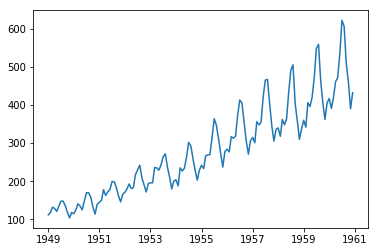

In [4]:
ts = df['#Passengers']
index = pd.date_range(start=ts.index[0], end=ts.index[len(ts)-1], freq='MS')
ts = pd.Series(ts.values, index)
plt.plot(ts)
plt.show()

In [2]:
from pyts.datasets import make_cylinder_bell_funnel

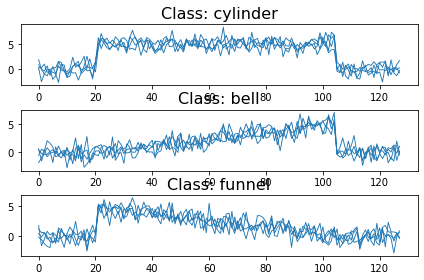

In [3]:
X, y = make_cylinder_bell_funnel(n_samples=12, random_state=42)

plt.figure()
for i, classe in enumerate(['cylinder', 'bell', 'funnel']):
    plt.subplot(3, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [4]:
X.shape

(12, 128)

In [87]:
df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/jupyter_notebooks/data/datatraining_fix_min.csv', parse_dates=True, index_col='date')
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:52:00,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


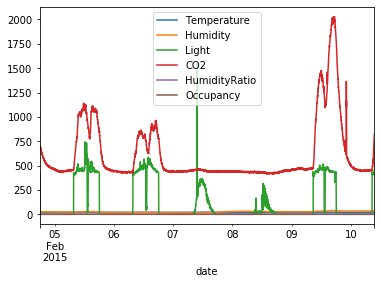

In [127]:
df.plot()

In [128]:
# ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio','Occupancy']

class_name= "Occupancy"
attributes = ['CO2'] #, 'Humidity', 'Light', 'CO2', 'HumidityRatio']

In [129]:
X = df[attributes].values
y = df[class_name].values

#X,y = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [130]:
arrX = X
arry= y

In [131]:
y.min()

0

In [132]:
print(len(X),len(y))

8143 8143


# Shapelet Discovery

https://tslearn.readthedocs.io/en/latest/gen_modules/shapelets/tslearn.shapelets.ShapeletModel.html#tslearn.shapelets.ShapeletModel

https://www.kaggle.com/group16/shapelets

In [133]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

In [134]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 8143
ts_sz 1
n_classes 2
shapelet_sizes {1: 3}


In [135]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [136]:
shp_clf.fit(X, y)

Epoch 1/200
8143/8143 [==============================] - 0s 37us/step - loss: 12.5674 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 2/200
8143/8143 [==============================] - 0s 8us/step - loss: 12.5673 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 3/200
8143/8143 [==============================] - 0s 8us/step - loss: 12.5672 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 4/200
8143/8143 [==============================] - 0s 9us/step - loss: 12.5670 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 5/200
8143/8143 [==============================] - 0s 8us/step - loss: 12.5669 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 6/200
8143/8143 [==============================] - 0s 8us/step - loss: 12.5668 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 7/200
8143/8143 [==============================] - 0s 9us/step - loss: 12.5667 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch

8143/8143 [==============================] - 0s 9us/step - loss: 12.5622 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 59/200
8143/8143 [==============================] - 0s 7us/step - loss: 12.5621 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 60/200
8143/8143 [==============================] - 0s 10us/step - loss: 12.5621 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 61/200
8143/8143 [==============================] - 0s 11us/step - loss: 12.5620 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 62/200
8143/8143 [==============================] - 0s 10us/step - loss: 12.5620 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 63/200
8143/8143 [==============================] - 0s 9us/step - loss: 12.5619 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 64/200
8143/8143 [==============================] - 0s 10us/step - loss: 12.5618 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 65

8143/8143 [==============================] - 0s 9us/step - loss: 12.5597 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 116/200
8143/8143 [==============================] - 0s 10us/step - loss: 12.5597 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 117/200
8143/8143 [==============================] - 0s 10us/step - loss: 12.5596 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 118/200
8143/8143 [==============================] - 0s 9us/step - loss: 12.5596 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 119/200
8143/8143 [==============================] - 0s 9us/step - loss: 12.5596 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 120/200
8143/8143 [==============================] - 0s 9us/step - loss: 12.5595 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 121/200
8143/8143 [==============================] - 0s 8us/step - loss: 12.5595 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoc

8143/8143 [==============================] - 0s 7us/step - loss: 12.5585 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 172/200
8143/8143 [==============================] - 0s 6us/step - loss: 12.5585 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 173/200
8143/8143 [==============================] - 0s 6us/step - loss: 12.5585 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 174/200
8143/8143 [==============================] - 0s 8us/step - loss: 12.5584 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 175/200
8143/8143 [==============================] - 0s 17us/step - loss: 12.5584 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 176/200
8143/8143 [==============================] - 0s 9us/step - loss: 12.5584 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch 177/200
8143/8143 [==============================] - 0s 6us/step - loss: 12.5584 - binary_accuracy: 0.2123 - binary_crossentropy: 12.5573
Epoch

ShapeletModel(batch_size=256, max_iter=200, n_shapelets_per_size={1: 3},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

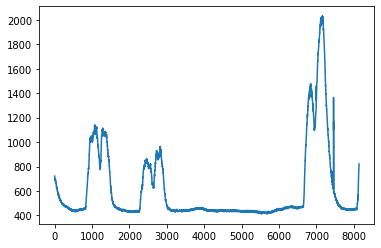

In [137]:
plt.plot(X)

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
predicted_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, predicted_labels))

8143/8143 [==============================] - 0s 2us/step
Correct classification rate: 0.2123296082524868


In [145]:
predicted_locations = shp_clf.locate(X)

8143/8143 [==============================] - 0s 2us/step


/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 8143 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [146]:
print(sum(shapelet_sizes.values()))

3


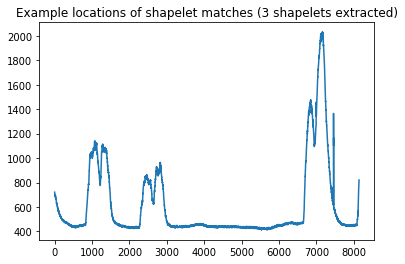

In [147]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "({} shapelets extracted)".format(n_shapelets))

plt.plot(X.ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

In [103]:
shp_clf.shapelets_

array([array([[465.97116089]]), array([[5.2108674]]),
       array([[256.36480713]])], dtype=object)

## Shaplet Discovery 2

In [148]:
from shapelets_lts.classification import LtsShapeletClassifier

https://github.com/mohaseeb/shaplets-python

In [149]:
shp_clf = LtsShapeletClassifier(
    K=10,
    R=1,
    L_min=10,
    epocs=10,
    lamda=0.01,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=False
)
"""
:param K: number of shapelets
:param R: scales of shapelet lengths
:param L_min: minimum shapelet length
"""

'\n:param K: number of shapelets\n:param R: scales of shapelet lengths\n:param L_min: minimum shapelet length\n'

In [150]:
print(len(X), len(y))

8143 8143


In [151]:
shp_clf.fit(X, y)

Network initialization ...
Using training data to initialize shaplets


ValueError: negative dimensions are not allowed

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
y_pred = shp_clf.predict(X)

print("Correct classification rate:", accuracy_score(y, y_pred))

IndexError: list index out of range

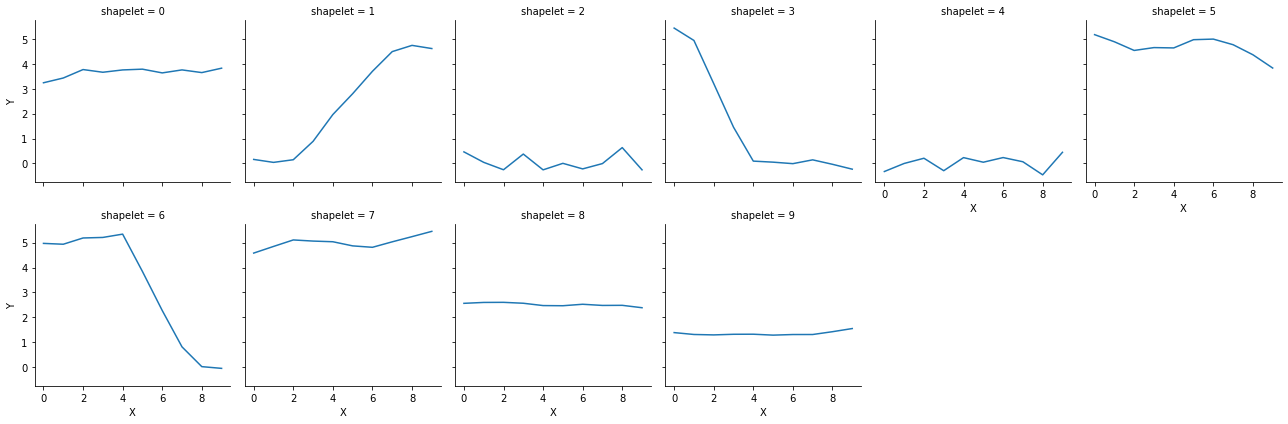

In [18]:
# retrieve the learnt shapelets
shapelets = shp_clf.get_shapelets()

# and plot sample shapelets
from shapelets_lts.util import plot_sample_shapelets
plot_sample_shapelets(shapelets=shapelets, sample_size=36)

In [19]:
len(shapelets)

10

In [20]:
shapelets

[array([5.17643982, 4.89025928, 4.54131821, 4.6559625 , 4.64268392,
        4.97376674, 4.99751238, 4.77154269, 4.36788093, 3.83416409]),
 array([ 0.46370571,  0.04296354, -0.25496795,  0.37602724, -0.25873935,
         0.00295488, -0.22030601, -0.00659532,  0.63525944, -0.25841625]),
 array([3.24173777, 3.43321672, 3.77292715, 3.66466581, 3.75808081,
        3.78885639, 3.63868741, 3.7589168 , 3.65096938, 3.82815328]),
 array([ 5.44007839,  4.94253294,  3.20893768,  1.45667799,  0.09212321,
         0.05023614, -0.00957012,  0.14305052, -0.03576401, -0.23189365]),
 array([2.55995497, 2.59609852, 2.59982083, 2.56326846, 2.4700226 ,
        2.46334663, 2.52240617, 2.47538325, 2.47964477, 2.38317519]),
 array([0.16021068, 0.04124148, 0.14789862, 0.88718554, 1.96493481,
        2.80175752, 3.70285342, 4.49473788, 4.74509731, 4.61758864]),
 array([-0.32578024, -0.00214041,  0.20790402, -0.29280926,  0.23290418,
         0.04797286,  0.23528591,  0.06612365, -0.45967908,  0.44658597]),
 arr

## Shaplet Discovery 3

In [110]:
from pyts.transformation import ShapeletTransform

https://pyts.readthedocs.io/en/stable/generated/pyts.transformation.ShapeletTransform.html#pyts.transformation.ShapeletTransform

In [111]:
st = ShapeletTransform(n_shapelets=3, window_sizes=[8])
st.fit(X, y)

ValueError: If the elements of 'window_sizes' are integers, they all must be greater than 0 and lower than or equal to n_timestamps.

In [23]:
len(st.shapelets_)

3

In [24]:
st.shapelets_

array([[3.32244276, 2.08622399, 2.34982847, 1.53841713, 2.98657494,
        1.31505755, 3.5554072 , 5.0680106 ],
       [3.16374059, 4.28167516, 1.31811493, 1.60277031, 2.19599592,
        1.77094864, 1.71521399, 0.37938582],
       [0.96106691, 3.45142688, 3.41783292, 3.10325445, 2.3698726 ,
        0.7297497 , 2.12349633, 1.22971042]])

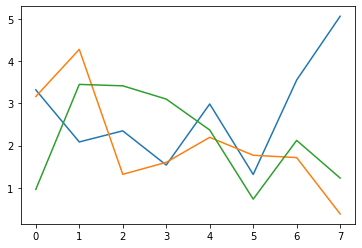

In [25]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

The indices for the corresponding shapelets in the training set. The first column consists of the indices of the samples. The second column consists of the starting indices (included) of the shapelets. The third column consists of the ending indices (excluded) of the shapelets.

In [26]:
st.indices_

array([[11, 66, 74],
       [ 2, 55, 63],
       [ 2, 76, 84]])

In [27]:
X[2][55:63]

array([3.16374059, 4.28167516, 1.31811493, 1.60277031, 2.19599592,
       1.77094864, 1.71521399, 0.37938582])

In [28]:
st.scores_

array([0.76075036, 0.77265512, 0.81987734])

## Shaplet Discovery 4

In [112]:
from pyts.classification import LearningShapelets

https://pyts.readthedocs.io/en/stable/generated/pyts.classification.LearningShapelets.html#pyts.classification.LearningShapelets

In [115]:
shp_clf = LearningShapelets(random_state=42)

In [116]:
shp_clf.fit(X, y)

ValueError: 'shapelet_scale' and 'min_shapelet_length' must be such that shapelet_scale * min_shapelet_length is smaller than or equal to n_timestamps.

In [32]:
len(shp_clf.shapelets_[0])

78

In [117]:
from pyts.utils import windowed_view

In [118]:
# Select three shapelets
sel_shapelets = np.asarray([shp_clf.shapelets_[0, 0], 
                        shp_clf.shapelets_[0, 1], 
                        shp_clf.shapelets_[0, 2]])

AttributeError: 'LearningShapelets' object has no attribute 'shapelets_'

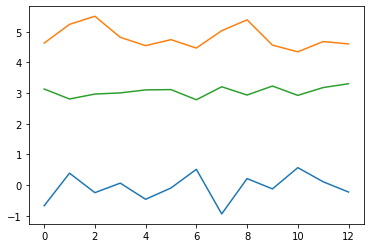

In [119]:
plt.plot(sel_shapelets[0])
plt.plot(sel_shapelets[1])
plt.plot(sel_shapelets[2])

plt.show()

In [120]:
# Derive the distances between the time series and a shapelets
shapelet_size = sel_shapelets.shape[1]
X_window = windowed_view(X, window_size=shapelet_size, window_step=1)
X_dist = np.mean((X_window[:, :, None] - sel_shapelets[None, :]) ** 2, axis=3).min(axis=1)

ValueError: 'window_size' must be an integer between 1 and n_timestamps.

In [121]:
X_dist

array([[0.59737952, 1.28796807, 0.50621251],
       [0.63559338, 0.4301728 , 3.68841088],
       [0.34604746, 0.70732199, 0.83927128],
       [0.42395593, 0.3064432 , 2.19689706],
       [0.31660035, 0.64211339, 0.61607883],
       [0.85146216, 1.08379101, 0.65999991],
       [0.36735134, 0.2589913 , 1.02243509],
       [0.44191696, 0.46102256, 2.86596557],
       [0.67295427, 0.66323123, 0.69942267],
       [0.50436926, 0.51245606, 2.60002204],
       [0.66321681, 0.64157927, 0.17103595],
       [0.21831585, 1.27528248, 1.03761191]])

In [122]:
np.mean(X_dist[y == 0], axis=0)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 8143

In [123]:
np.mean(X_dist[y == 1], axis=0)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 8143

In [124]:
np.mean(X_dist[y == 2], axis=0)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 8143

# Matrix Profile

https://github.com/target/matrixprofile-ts

https://github.com/TDAmeritrade/stumpy

In [41]:
from matrixprofile import *

ModuleNotFoundError: No module named 'matrixprofile'

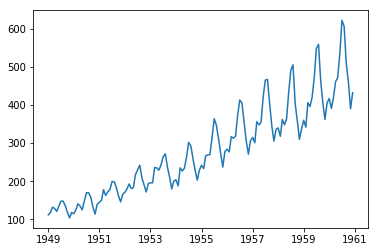

In [37]:
plt.plot(ts)
plt.show()

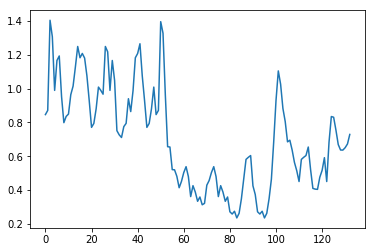

In [38]:
w = 12
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

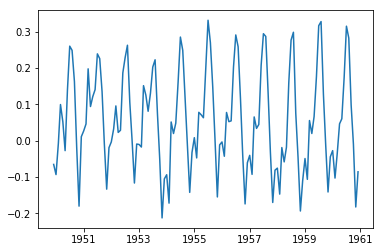

In [39]:
window = 12
ts_log_mov_diff = pd.Series(np.log(ts) - np.log(ts).rolling(window, center=False).mean(), index=ts.index)

plt.plot(ts_log_mov_diff)
plt.show()

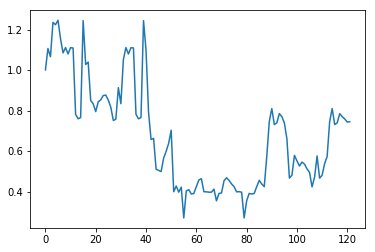

In [40]:
w = 12
mp, mpi = matrixProfile.stomp(ts_log_mov_diff.values[11:], w)

plt.plot(mp)
plt.show()

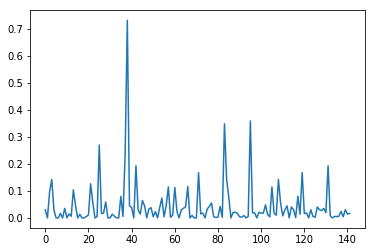

In [64]:
w = 3
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

# Motif Discovery

In [83]:
#mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)

Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.

Returns
The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

In [84]:
mo

[[5, 17, 47], [34, 113], [52, 133], [70, 74]]

In [85]:
mod

[2.220446049250313e-16,
 2.220446049250313e-16,
 2.220446049250313e-16,
 2.220446049250313e-16]

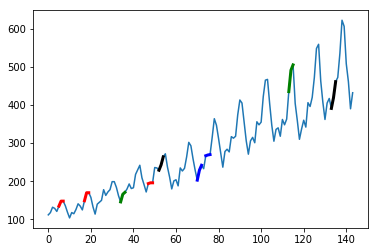

In [87]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

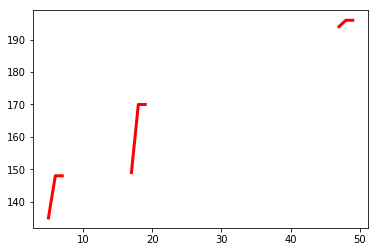

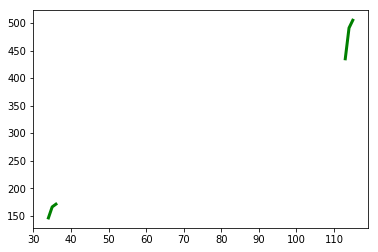

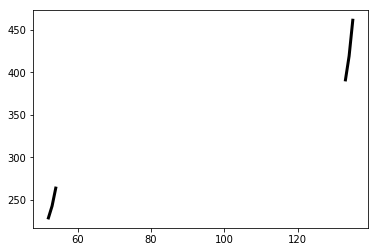

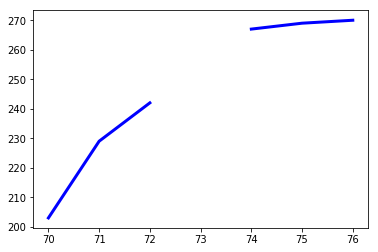

In [88]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

# Anomaly Discovery

In [90]:
from matrixprofile.discords import discords

Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord    

Returns 
 - a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

In [91]:
anoms = discords(mp, ex_zone=3, k=5)

In [92]:
anoms

array([38, 95, 83, 25, 42])

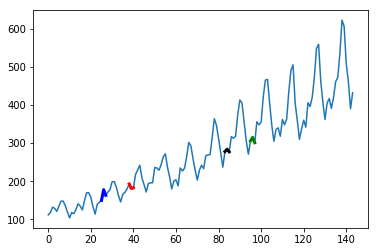

In [95]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()